<a href="https://colab.research.google.com/github/katyreena/MAI/blob/main/AI/Homework_2022/LR_7/LW_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ТЗ к лабораторной работе №7:
1. Реазизовать метод "Выборка отклонений"  - Rejection sampling  
2. Реазиовать метод Метрополиса-Гастингса (MCMC)  
3. Применить для 2 тестовых функций плотности 

In [ ]:
import math
import copy
import numpy as np
import random
from matplotlib import pyplot as plt
from enum import Enum
from typing import Tuple, Mapping

In [ ]:
def distribution_density_Cos(x):
  return -math.cos(x) if math.pi < x < 1.5*math.pi else 0
def distribution_density_Weibull(x, alpha = 0.9, k=2.5):
  return (k/alpha) * ((x/alpha)**(k-1)) * (math.exp(-x/alpha)**k)

##1.1 Метод Rejection Sampling

In [ ]:
'''
  Описание:
    Функция плотности нормального распределения.

  Параметры:
    x - нач. точка;
    m - мат. ожидание;
    d - дисперсия.

  Возврат:
    Функция плотности нормального распределения.
'''
def normal_dist(x: float, m: float = 0.35 , d: int = 1) -> float:
    return (math.exp((x - m)**2/(-2*d**2))/(d*(2*math.pi)**0.5))

'''
  Описание:
    Метод "Выборка оклонений" для распределения y = {-cos x; pi < x < 1.5pi }.

  Аргументы:
    count - количество семплируемых точек
    m - мат. ожидание
    d - дисперсия
    c - коэффициент умножения

  Возврат:
    Семпл функции y = {-cos x; pi < x < 1.5pi }.
'''
def rejection_sampling_Cos(count = 200, m = math.pi, d = 1, c = 1):
  result = []

  while len(result) < count:
    x = np.random.normal(m, 0.5)
    u = np.random.uniform(0, c * normal_dist(x, m, d))
    px = distribution_density_Cos(x)
    if (isinstance(px, complex) and (px.imag != 0)): continue 
    if(px > u):
      result.append(x)
  return result

'''
  Описание:
    Метод "Выборка оклонений" для распределения Вейбула.

  Аргументы:
    count - количество семплируемых точек
    m - мат. ожидание
    d - дисперсия
    c - коэффициент умножения

  Возврат:
    Семпл функции Вейбула.
'''
def rejection_sampling_Weibull(count = 200, m = 0.35, d = 1, c = 1):
  result = []

  while len(result) < count:
    x = np.random.normal(m, 0.5)
    u = np.random.uniform(0, c * normal_dist(x, m, d))
    px = distribution_density_Weibull(x)
    if (isinstance(px, complex) and (px.imag != 0)): continue 
    if(px > u):
      result.append(x)
  return result

###Демонстрации работы для распределения $y = {-cos (x); \text{ }\text{ }\text{ } \pi < x < 1.5\pi. }$

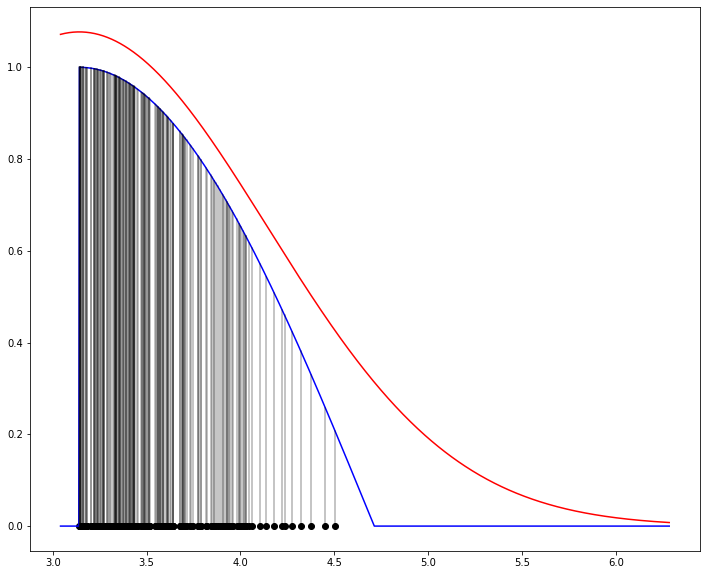

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
x = np.linspace(math.pi - 0.1, 2*math.pi, 1000)
c = 2.7
mean = math.pi
y_red = [c*normal_dist(xi, mean) for xi in x]
y_blue = [distribution_density_Cos(xi) for xi in x]
sample = rejection_sampling_Cos(200, mean, c)
plt.plot(x, y_red, color = 'red')
plt.plot(x, y_blue, color = 'blue')

for i in range(len(sample)):
  plt.plot([sample[i], sample[i]],  np.linspace(0, distribution_density_Cos(sample[i]), 2), color = 'black', alpha=0.3)
  ax.scatter(sample[i], 0, color = 'black')
plt.show()

###Демонстрация работы для распределения Вейбула

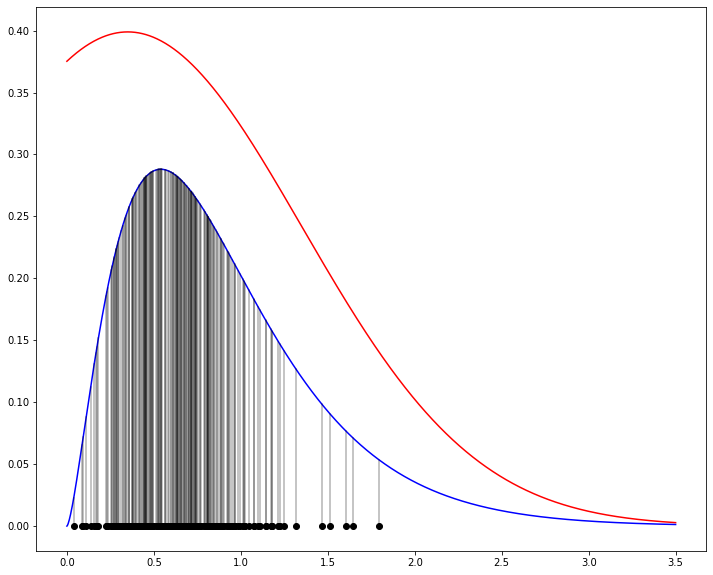

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
x = np.linspace(0, 3.5, 1000)
y_red = [normal_dist(xi) for xi in x] 
y_blue = [distribution_density_Weibull(xi) for xi in x] 
sample = rejection_sampling_Weibull()
plt.plot(x, y_red, color = 'red')
plt.plot(x, y_blue, color = 'blue')

for i in range(len(sample)):
  plt.plot([sample[i], sample[i]],  np.linspace(0, distribution_density_Weibull(sample[i]), 2), color = 'black', alpha=0.3)
  ax.scatter(sample[i], 0, color = 'black')
plt.show()

##2 Метод Markov Chain Monte Carlo

In [ ]:
'''
  Описание:
    Метод MCMC для распределения y = { -cos x; pi < x < 1.5pi }.

  Аргументы:
    count - количество семплируемых точек;
    m - мат. ожидание;
    d - дисперсия.

  Возврат:
    Семпл функции y = { -cos x; pi < x < 1.5pi }.
'''
def metropolis_Hastings_Cos(count: int = 200, d: int = 1) -> list:
  result = [np.random.uniform(math.pi, 1.5*math.pi)]
  while len(result) < count:
    xt = result[-1]
    xi = np.random.normal(xt, d)
    a = distribution_density_Cos(xi)/distribution_density_Cos(xt)
    if np.random.binomial(1,min(a,1),1)[0] == 1:
      result.append(xi)
    elif result[-1] != xt: result.append(xt)
  return result
  
'''
  Описание:
    Метод MCMC для распределения Вейбула.

  Аргументы:
    count - количество семплируемых точек;
    m - мат. ожидание;
    d - дисперсия.

  Возврат:
    Семпл функции Вейбула.
'''
def metropolis_Hastings_Weibull(count: int = 200, d: int = 1) -> list:
  result = [np.random.uniform(0, 2.5)]
  while len(result) < count:
    xt = result[-1]
    xi = np.random.normal(xt, d)
    a = distribution_density_Weibull(xi)/distribution_density_Weibull(xt)
    if (isinstance(a, complex) and (a.imag != 0)): continue
    if np.random.binomial(1,min(a,1),1)[0] == 1:
      result.append(xi)
    elif result[-1] != xt: result.append(xt)
  return result

###Демонстрации работы для распределения Вейбула

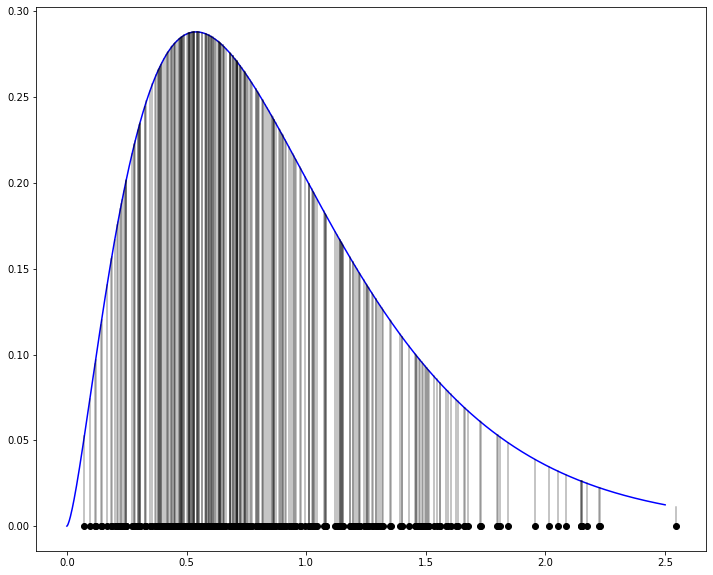

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
x = np.linspace(0, 2.5, 1000)
y_blue = [distribution_density_Weibull(xi) for xi in x]
sample = metropolis_Hastings_Weibull(300, 0.3)
plt.plot(x, y_blue, color = 'blue')

for i in range(len(sample)):
  plt.plot([sample[i], sample[i]],  np.linspace(0, distribution_density_Weibull(sample[i]), 2), color = 'black', alpha=0.3)
  ax.scatter(sample[i], 0, color = 'black')
plt.show()

###Демонстрации работы для распределения $y = {-cos (x); \text{ }\text{ }\text{ } \pi < x < 1.5\pi. }$

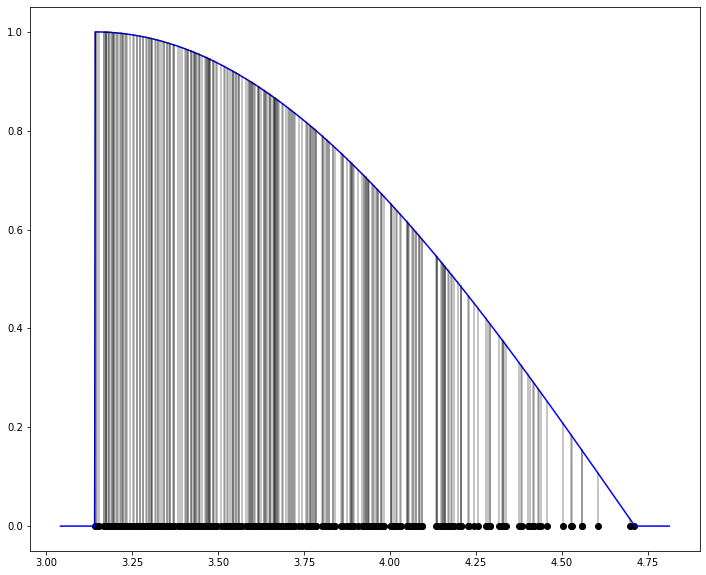

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
x = np.linspace(math.pi - 0.1, 1.5*math.pi + 0.1, 1000)
y_blue = [distribution_density_Cos(xi) for xi in x]
sample = metropolis_Hastings_Cos(300, 1)
plt.plot(x, y_blue, color = 'blue')

for i in range(len(sample)):
  plt.plot([sample[i], sample[i]],  np.linspace(0, distribution_density_Cos(sample[i]), 2), color = 'black', alpha=0.3)
  ax.scatter(sample[i], 0, color = 'black')
plt.show()